Fase 1: Data Understanding

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya visualisasi agar lebih menarik
sns.set_theme(style="whitegrid")

# 2. Muat dataset dari folder 'data'
# '..' artinya "naik satu level direktori" dari folder 'notebooks'
file_path = '../data/telecom_churn_raw.csv' 
df = pd.read_csv(file_path)

# 3. Tampilkan 5 baris pertama untuk memastikan data termuat dengan benar
print("5 Baris Pertama Data:")
display(df.head())

# 4. Lihat informasi dasar tentang dataset
print("\nInformasi Dataset:")
df.info()

5 Baris Pertama Data:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

Fase 2: Data Preparation

In [2]:
# Mengubah TotalCharges menjadi numerik
# errors='coerce' akan mengubah nilai yang tidak bisa diubah (seperti spasi) menjadi NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Mari kita cek lagi missing values setelah konversi
print("Jumlah Missing Values Setelah Konversi TotalCharges:")
print(df.isnull().sum())

Jumlah Missing Values Setelah Konversi TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [3]:
# Tampilkan baris di mana TotalCharges adalah NaN
display(df[df['TotalCharges'].isnull()])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [4]:
# Mengisi nilai NaN di TotalCharges dengan 0
df['TotalCharges'].fillna(0, inplace=True)

# Verifikasi ulang, seharusnya sudah tidak ada missing values di TotalCharges
print("Jumlah Missing Values Setelah Diisi:")
print(df.isnull().sum())

Jumlah Missing Values Setelah Diisi:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\Besto\AppData\Local\Temp\ipykernel_28404\887100253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [5]:
# Membuat kolom 'Churn_numeric'
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("Contoh data dengan kolom baru 'Churn_numeric':")
display(df[['Churn', 'Churn_numeric']].head())

Contoh data dengan kolom baru 'Churn_numeric':


,Churn,Churn_numeric
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


Fase 3: Exploratory Data Analysis

In [6]:
# Menghitung tingkat churn keseluruhan
overall_churn_rate = df['Churn_numeric'].mean()
print(f"Tingkat Churn Keseluruhan: {overall_churn_rate:.2%}")

# Menganalisis karakteristik pelanggan churn vs non-churn
churn_characteristics = df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().round(2)
print("\nKarakteristik Pelanggan Berdasarkan Status Churn:")
display(churn_characteristics)

Tingkat Churn Keseluruhan: 26.54%

Karakteristik Pelanggan Berdasarkan Status Churn:


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.57,61.27,2549.91
Yes,17.98,74.44,1531.80


Tingkat Churn Berdasarkan Tipe Kontrak:
Contract
Month-to-month    42.71%
One year          11.27%
Two year           2.83%
Name: Churn_numeric, dtype: object


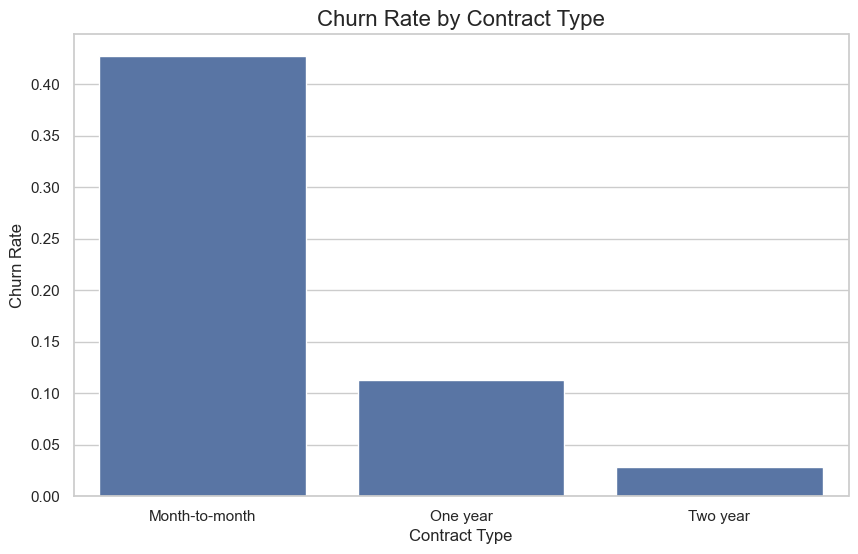


Distribusi Tipe Kontrak di Antara Pelanggan yang Churn:
Contract
Month-to-month    88.55%
One year           8.88%
Two year           2.57%
Name: proportion, dtype: object


In [7]:
# 1. Tingkat churn berdasarkan tipe kontrak
churn_by_contract = df.groupby('Contract')['Churn_numeric'].mean().sort_values(ascending=False)
print("Tingkat Churn Berdasarkan Tipe Kontrak:")
print(churn_by_contract.apply(lambda x: f"{x:.2%}"))

# Visualisasi tingkat churn per kontrak
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values)
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.show()

# 2. Porsi pelanggan churn dari setiap tipe kontrak
churned_customers = df[df['Churn'] == 'Yes']
contract_churn_distribution = churned_customers['Contract'].value_counts(normalize=True)
print("\nDistribusi Tipe Kontrak di Antara Pelanggan yang Churn:")
print(contract_churn_distribution.apply(lambda x: f"{x:.2%}"))

Tingkat Churn Berdasarkan Kepemilikan Tech Support:
TechSupport
No                     41.64%
Yes                    15.17%
No internet service     7.40%
Name: Churn_numeric, dtype: object

Tingkat Churn Berdasarkan Kepemilikan Online Security:
OnlineSecurity
No                     41.77%
Yes                    14.61%
No internet service     7.40%
Name: Churn_numeric, dtype: object


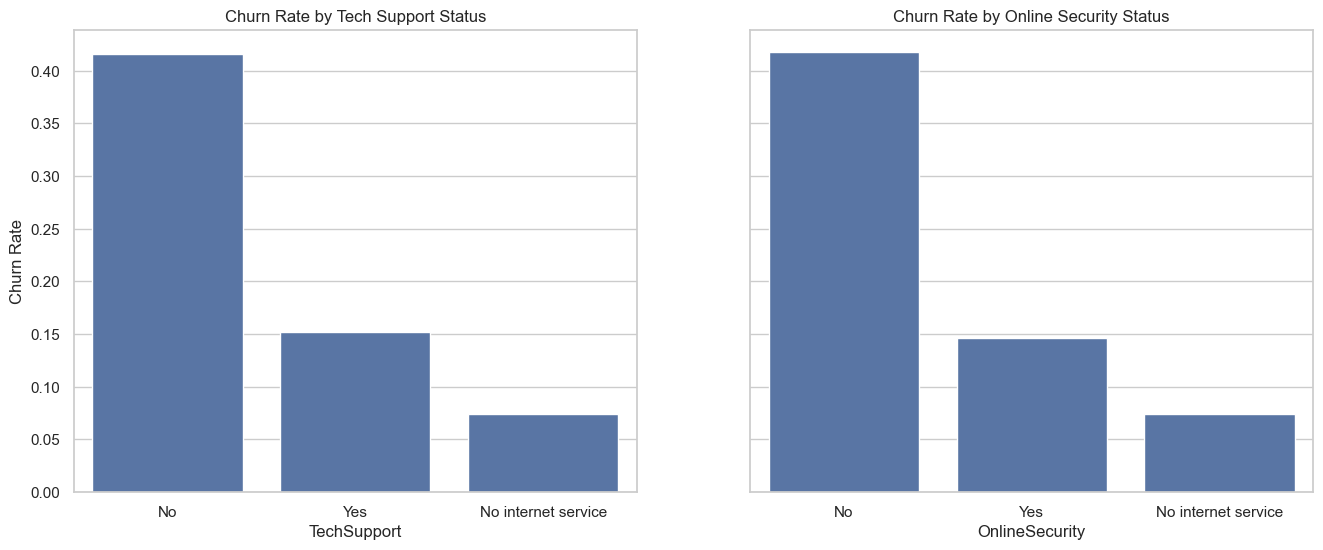

In [8]:
# Menganalisis churn berdasarkan kepemilikan TechSupport
churn_by_techsupport = df.groupby('TechSupport')['Churn_numeric'].mean().sort_values(ascending=False)
print("Tingkat Churn Berdasarkan Kepemilikan Tech Support:")
print(churn_by_techsupport.apply(lambda x: f"{x:.2%}"))

# Menganalisis churn berdasarkan kepemilikan OnlineSecurity
churn_by_onlinesecurity = df.groupby('OnlineSecurity')['Churn_numeric'].mean().sort_values(ascending=False)
print("\nTingkat Churn Berdasarkan Kepemilikan Online Security:")
print(churn_by_onlinesecurity.apply(lambda x: f"{x:.2%}"))

# Visualisasi untuk perbandingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.barplot(ax=axes[0], x=churn_by_techsupport.index, y=churn_by_techsupport.values)
axes[0].set_title('Churn Rate by Tech Support Status')
axes[0].set_ylabel('Churn Rate')

sns.barplot(ax=axes[1], x=churn_by_onlinesecurity.index, y=churn_by_onlinesecurity.values)
axes[1].set_title('Churn Rate by Online Security Status')
plt.show()

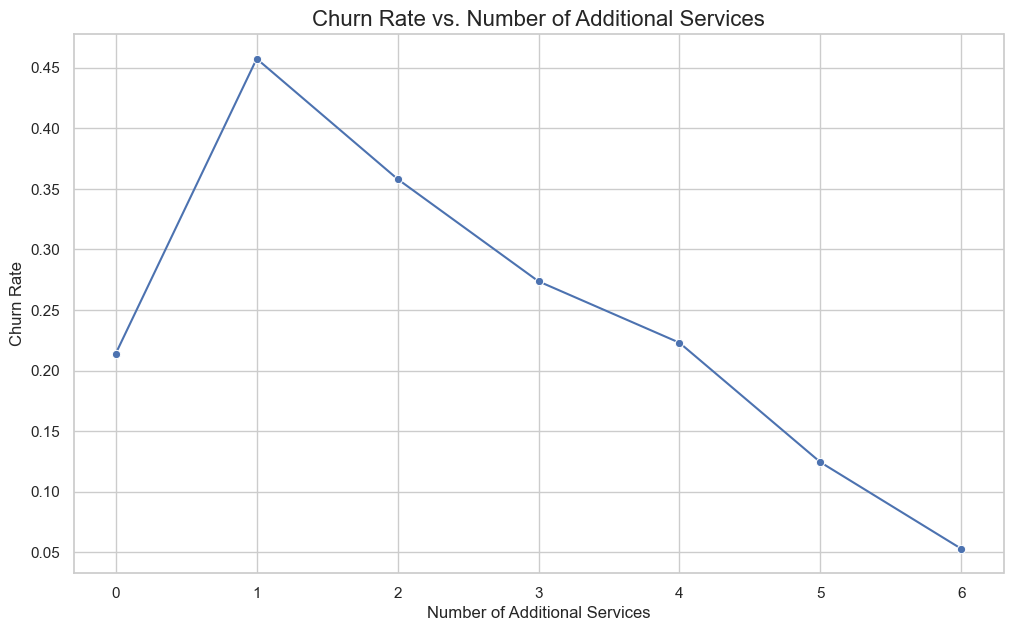

In [9]:
# Daftar kolom yang merupakan layanan tambahan
additional_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Hitung jumlah layanan tambahan yang dimiliki setiap pelanggan
# (Mengubah 'Yes' menjadi 1, selain itu 0, lalu menjumlahkannya per baris)
df['Num_Additional_Services'] = df[additional_services].apply(lambda row: sum(val == 'Yes' for val in row), axis=1)

# Analisis churn rate berdasarkan jumlah layanan tambahan
churn_by_num_services = df.groupby('Num_Additional_Services')['Churn_numeric'].mean()

# Visualisasi
plt.figure(figsize=(12, 7))
sns.lineplot(x=churn_by_num_services.index, y=churn_by_num_services.values, marker='o')
plt.title('Churn Rate vs. Number of Additional Services', fontsize=16)
plt.xlabel('Number of Additional Services')
plt.ylabel('Churn Rate')
plt.xticks(churn_by_num_services.index) # Memastikan semua angka di sumbu x muncul
plt.show()

In [10]:
# Tambahkan sel baru untuk menyelidiki anomali ini
df[df['Num_Additional_Services'] == 1]['InternetService'].value_counts(normalize=True)

InternetService
Fiber optic    0.570393
DSL            0.429607
Name: proportion, dtype: float64

In [11]:
# --- Q5: Financial Impact Analysis ---

# 1. Hitung Kerugian Pendapatan Bulanan (Monthly Recurring Revenue - MRR)
churned_customers_df = df[df['Churn'] == 'Yes']
total_mrr_loss = churned_customers_df['MonthlyCharges'].sum()

print("--- Analisis Dampak Finansial ---")
print(f"Total Pelanggan Churn: {len(churned_customers_df)} orang")
print(f"Estimasi Kerugian Pendapatan Bulanan (MRR Lost): ${total_mrr_loss:,.2f}")
print(f"Estimasi Kerugian Pendapatan Tahunan (Annual Recurring Revenue - ARR Lost): ${total_mrr_loss * 12:,.2f}")
print("-" * 35)

# 2. Analisis Skenario: "What-if" kita bisa menyelamatkan pelanggan M2M
# Identifikasi pelanggan M2M yang churn
m2m_churned_df = churned_customers_df[churned_customers_df['Contract'] == 'Month-to-month']
mrr_loss_from_m2m = m2m_churned_df['MonthlyCharges'].sum()
percentage_loss_from_m2m = (mrr_loss_from_m2m / total_mrr_loss)

print(f"Kerugian MRR dari segmen 'Month-to-month' saja: ${mrr_loss_from_m2m:,.2f}")
print(f"Ini setara dengan {percentage_loss_from_m2m:.2%} dari total kerugian MRR akibat churn.")
print("\n")


# 3. Hitung Potensi Penghematan (Skenario Bisnis)
# Skenario: Kita meluncurkan program retensi dan berhasil mengurangi churn rate M2M sebesar 25% (angka hipotetis)
# Pertama, hitung churn rate M2M saat ini
m2m_customers_total = len(df[df['Contract'] == 'Month-to-month'])
m2m_churn_rate_current = len(m2m_churned_df) / m2m_customers_total

# Hitung jumlah pelanggan M2M yang bisa diselamatkan
reduction_target = 0.25 # Target pengurangan churn rate 25%
saved_customers_scenario = round(len(m2m_churned_df) * reduction_target)

# Asumsikan pelanggan yang diselamatkan memiliki rata-rata MonthlyCharges yang sama dengan yang churn
avg_mrr_m2m_churn = m2m_churned_df['MonthlyCharges'].mean()
potential_mrr_saved_monthly = saved_customers_scenario * avg_mrr_m2m_churn

print("--- Skenario Potensi Penghematan ---")
print("Asumsi: Program retensi berhasil menurunkan jumlah pelanggan 'Month-to-month' yang churn sebesar 25%.")
print(f"Jumlah pelanggan 'Month-to-month' yang bisa diselamatkan: {int(saved_customers_scenario)} orang")
print(f"Potensi Pendapatan Bulanan (MRR) yang bisa diselamatkan: ${potential_mrr_saved_monthly:,.2f}")
print(f"Potensi Pendapatan Tahunan (ARR) yang bisa diselamatkan: ${potential_mrr_saved_monthly * 12:,.2f}")

--- Analisis Dampak Finansial ---
Total Pelanggan Churn: 1869 orang
Estimasi Kerugian Pendapatan Bulanan (MRR Lost): $139,130.85
Estimasi Kerugian Pendapatan Tahunan (Annual Recurring Revenue - ARR Lost): $1,669,570.20
-----------------------------------
Kerugian MRR dari segmen 'Month-to-month' saja: $120,847.10
Ini setara dengan 86.86% dari total kerugian MRR akibat churn.


--- Skenario Potensi Penghematan ---
Asumsi: Program retensi berhasil menurunkan jumlah pelanggan 'Month-to-month' yang churn sebesar 25%.
Jumlah pelanggan 'Month-to-month' yang bisa diselamatkan: 414 orang
Potensi Pendapatan Bulanan (MRR) yang bisa diselamatkan: $30,230.03
Potensi Pendapatan Tahunan (ARR) yang bisa diselamatkan: $362,760.36


In [12]:
# --- Q6: High-Value, High-Risk Customer Segmentation ---

# 1. Filter untuk pelanggan aktif yang berisiko tinggi
# Kita definisikan "berisiko tinggi" sebagai:
# - Masih aktif (belum churn)
# - Kontrak 'Month-to-month'
# - Baru berlangganan (misal: tenure <= 12 bulan)
high_risk_customers = df[
    (df['Churn'] == 'No') &
    (df['Contract'] == 'Month-to-month') &
    (df['tenure'] <= 12)
]

# 2. Filter lebih lanjut untuk "High-Value"
# Kita definisikan "high-value" sebagai pelanggan yang tagihannya di atas rata-rata tagihan semua pelanggan M2M
avg_mrr_m2m = df[df['Contract'] == 'Month-to-month']['MonthlyCharges'].mean()

# Inilah segmen prioritas utama kita
priority_segment = high_risk_customers[high_risk_customers['MonthlyCharges'] > avg_mrr_m2m]

# Urutkan berdasarkan MonthlyCharges tertinggi untuk melihat yang paling "berharga"
priority_segment_sorted = priority_segment.sort_values(by='MonthlyCharges', ascending=False)


# 3. Sajikan hasil analisis dalam bentuk ringkasan bisnis
total_active_customers = len(df[df['Churn'] == 'No'])
total_mrr_active = df[df['Churn'] == 'No']['MonthlyCharges'].sum()

num_priority_customers = len(priority_segment)
mrr_priority_segment = priority_segment['MonthlyCharges'].sum()
percentage_of_customers = num_priority_customers / total_active_customers
percentage_of_mrr = mrr_priority_segment / total_mrr_active


print("\n--- Analisis Segmen Prioritas (High-Value, High-Risk) ---")
print("Definisi: Pelanggan aktif, kontrak M2M, tenure <= 12 bulan, tagihan > rata-rata M2M.")
print(f"Jumlah pelanggan di segmen prioritas ini: {num_priority_customers} orang")
print(f"Total pendapatan bulanan (MRR) dari segmen ini: ${mrr_priority_segment:,.2f}")
print("-" * 55)
print(f"Meskipun segmen ini hanya mewakili {percentage_of_customers:.2%} dari total pelanggan aktif kita,")
print(f"mereka menyumbang {percentage_of_mrr:.2%} dari total pendapatan bulanan kita yang sedang berisiko tinggi.")
print("-" * 55)

# Tampilkan 10 pelanggan teratas yang harus segera dihubungi tim retensi
print("\nTop 10 Pelanggan Prioritas untuk Dihubungi Segera:")
display(priority_segment_sorted[['customerID', 'tenure', 'MonthlyCharges', 'InternetService', 'Num_Additional_Services']].head(10))


--- Analisis Segmen Prioritas (High-Value, High-Risk) ---
Definisi: Pelanggan aktif, kontrak M2M, tenure <= 12 bulan, tagihan > rata-rata M2M.
Jumlah pelanggan di segmen prioritas ini: 305 orang
Total pendapatan bulanan (MRR) dari segmen ini: $24,290.55
-------------------------------------------------------
Meskipun segmen ini hanya mewakili 5.89% dari total pelanggan aktif kita,
mereka menyumbang 7.66% dari total pendapatan bulanan kita yang sedang berisiko tinggi.
-------------------------------------------------------

Top 10 Pelanggan Prioritas untuk Dihubungi Segera:


,customerID,tenure,MonthlyCharges,InternetService,Num_Additional_Services
1568,3292-PBZEJ,11,111.40,Fiber optic,5
1719,2081-VEYEH,3,107.95,Fiber optic,5
678,5760-IFJOZ,3,107.95,Fiber optic,4
2387,6734-GMPVK,5,105.30,Fiber optic,4
2582,7145-FEJWU,12,105.30,Fiber optic,4
3872,2018-PZKMU,9,103.10,Fiber optic,4
6963,9547-ITEFG,9,102.60,Fiber optic,4
5031,8118-TJAFG,9,101.50,Fiber optic,4
3270,4132-KALRO,4,100.85,Fiber optic,3
2530,0722-SVSFK,7,100.40,Fiber optic,4
